In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk

Importing and Cleaning the Data


In [73]:
data = pd.read_csv('spam.csv', encoding='latin-1')
df = pd.DataFrame(data)

#changing column names and selecting relevant columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
data = df[['label', 'message']]
#encoding labels spam=1, ham=0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
#deleting null values
df.dropna(inplace=True)
#deleting duplicates
df = df.drop_duplicates(keep = 'first')


Perfroming Exploratory Data Analysis


<Axes: xlabel='label', ylabel='count'>

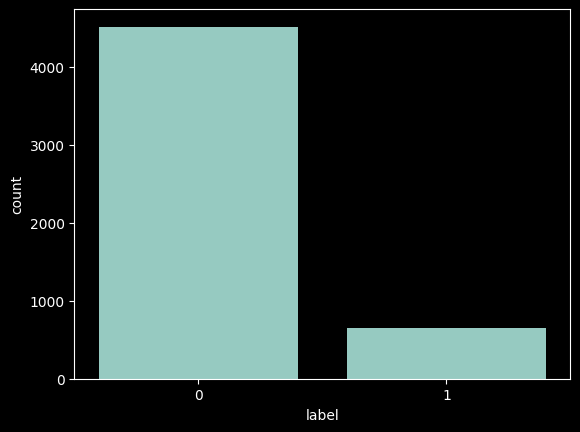

In [74]:
X = np.array(data['label'])
y = np.array(data['message'])
sns.countplot(x='label', data=df)

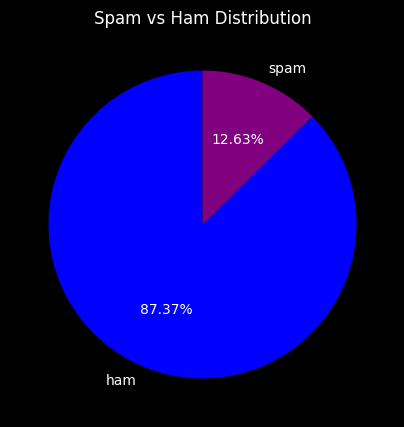

In [75]:
plt.figure(figsize=(5,5))
plt.pie(
    df['label'].value_counts(),
    labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=['blue', 'purple'],
    textprops={'color': 'white'}
)
plt.title("Spam vs Ham Distribution", color='white')
plt.show()


In [95]:
df['num_char'] = df['message'].apply(len)

In [ ]:
df['num_word'] = df['message'].apply(lambda x: len(x.split()))

In [100]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [101]:
df.head()

,label,message,num_char,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [102]:
df[['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.965564
std,58.236293,11.068488,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,22.000000,2.000000
max,910.000000,171.000000,38.000000


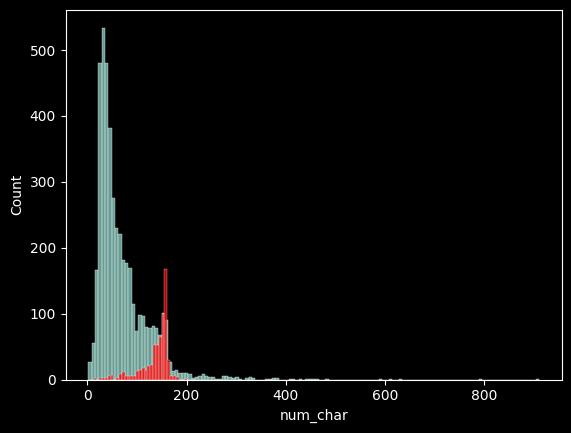

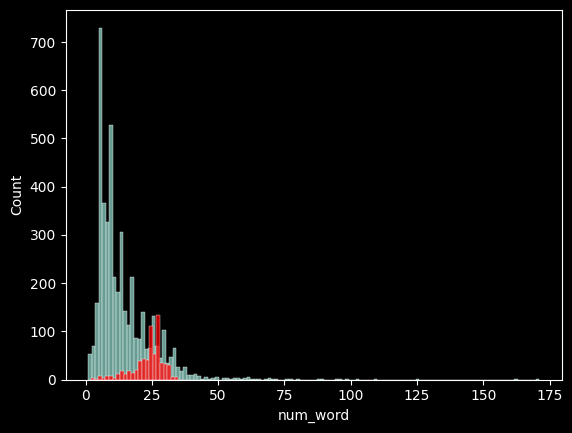

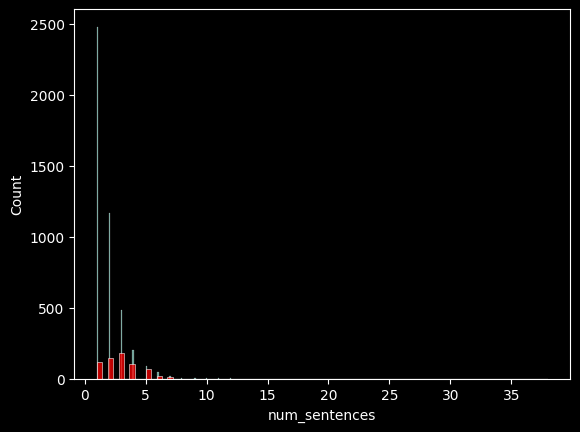

In [112]:
plt.Figure(figsize=(12,16))
sns.histplot(df[df['label'] == 0]['num_char'])
sns.histplot(df[df['label'] == 1]['num_char'],color='red')
plt.show()

plt.Figure(figsize=(12,16))
sns.histplot(df[df['label'] == 0]['num_word'])
sns.histplot(df[df['label'] == 1]['num_word'],color='red')
plt.show()

plt.Figure(figsize=(12,16))
sns.histplot(df[df['label'] == 0]['num_sentences'])
sns.histplot(df[df['label'] == 1]['num_sentences'],color='red')
plt.show()

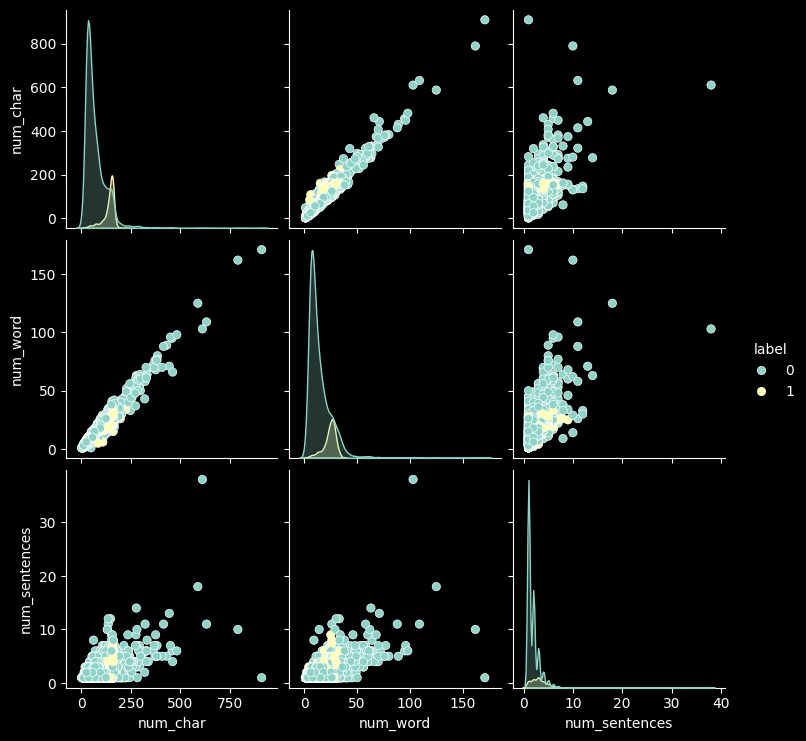

In [114]:
sns.pairplot(df,hue = 'label')
plt.show()

<Axes: >

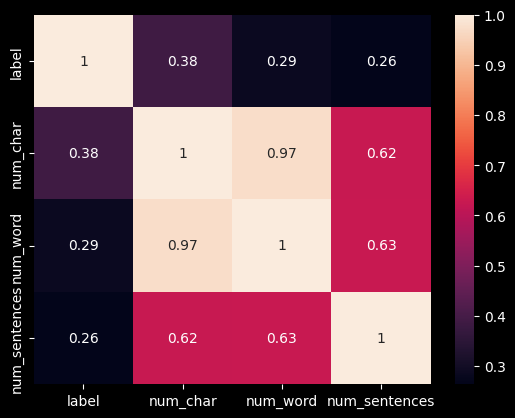

In [118]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)